In [1]:
#  Binome : HAMAT - GLASS : 

Réduction de dimensions et Visualisation des données : startups


In [ ]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('./50_startups.csv', sep=';')
X = data.iloc[:, 1:].values
labels = data.iloc[:, 0].values

In [3]:
data.head()

,Id,Depenses R&D,Depenses Administration,Depenses Marketing Spend,Benefice
0,1,165349.20,136897.80,471784.10,192261.83
1,2,162597.70,151377.59,443898.53,191792.06
2,3,153441.51,101145.55,407934.54,191050.39
3,4,144372.41,118671.85,383199.62,182901.99
4,5,142107.34,91391.77,366168.42,166187.94


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [5]:
SC = StandardScaler()
SC.fit(X)
Xnorm = SC.transform(X)
# print(X, Xnorm)
pca=PCA(n_components = 4)
#print("pca",pca)
pca.fit(Xnorm)

print("explained_variance_", pca.explained_variance_)

explained_variance_ [2.7267099  1.04019163 0.28830861 0.02642251]


In [6]:
# On demande un ratio de 90% de l'information
requestedRatio = 0.9
sumRatio = 0
nbVar = 0
print("explained_variance_ratio_", pca.explained_variance_ratio_)
for nextRatio in pca.explained_variance_ratio_ :
    sumRatio = sumRatio + nextRatio
    print(nextRatio, sumRatio )
    nbVar = nbVar+1
    if(sumRatio>=requestedRatio): 
        print("ok",sumRatio )
        break
# Ici on prend les deux premières variables pour avoir 90% de l'information
print("nbVar", nbVar)


explained_variance_ratio_ [0.66804393 0.25484695 0.07063561 0.00647351]
0.6680439261196344 0.6680439261196344
0.2548469485310598 0.9228908746506942
ok 0.9228908746506942
nbVar 2


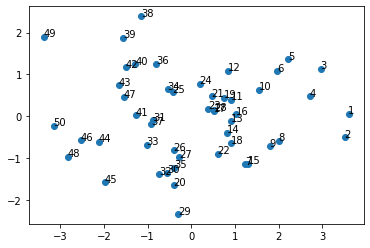

In [7]:
X_pca = pca.transform(Xnorm)

#print("X_pca", X_pca, X_pca[:,0], X_pca[:,1],)

plt.scatter(X_pca[:,0], X_pca[:,1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
#for label, x, y in zip(labels, X_)

#  le premier exe correspond à peu près à une moyenne des 12 valeurs, étannt donné que les 12 poids du 1er axe sont presques identiques)
#  le 2e axe  monte vers le haut les données ayant de fortes valeur en hivers et descend les donnée ayant des fortes valeurs en été
#    (il représente l'écart hivers/été)
# Le premier axe conserve 66% de la variance du nuage.
# Le 2e axe conserve 25 % de la variance du nuage
# Les deux premiers conservent 92 % de l'inertie du nuage.
